# Д/З Статистическая проверка гипотез для связанных выборок. A/B тесты.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
import scipy.stats as stats
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

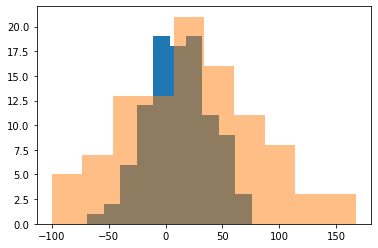

In [3]:
plt.hist(A)
plt.hist(B, alpha=0.5)

Так как p-value = 0.084 > 0.05 мы не можем сказать есть ли различие в эффекте у этих пациентов.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [4]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [5]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test

In [6]:
stat, p = wilcoxon(A, B)
p

0.04077572901549266

(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

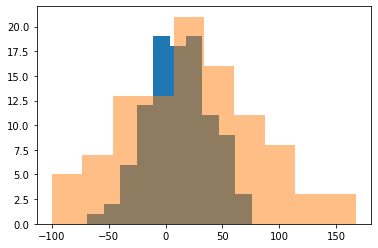

In [7]:
plt.hist(A)
plt.hist(B, alpha=0.5)

Так как p-value = 0.04 < 0.05 мы можем, что есть различие в эффекте у этих пациентов.

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
</div>

In [8]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [9]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

In [10]:
F, p = f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) ANOVA
p

2.9240047906326866e-05

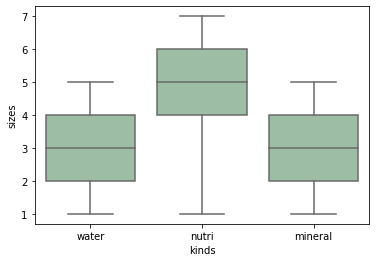

In [11]:
df_mid = pd.DataFrame()
df_mid['sizes'] = water + nutri + mineral
df_mid['kinds'] = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')

Так как p-value = 0.000029 < 0.05 мы можем сказать, что есть различие между разными подходами по уходу за огурцами. Исходя из граффика метод nutri является самым эффективным.

# Cookie Cats (Обязательно)

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
</div>

In [12]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [13]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats 

In [14]:
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
p

0.3729086824696095

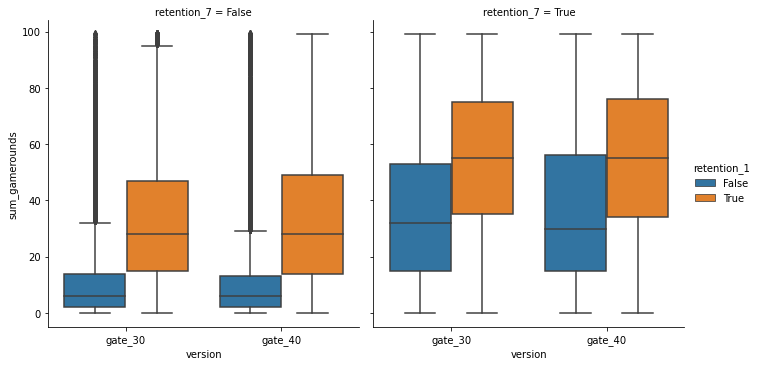

In [15]:
df = data.loc[data['sum_gamerounds'] < 100].copy();
sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Count'>

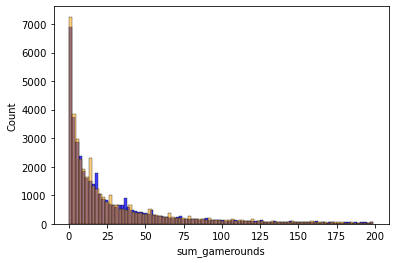

In [16]:
sns.histplot(x=data[(data['version'] == 'gate_30') & (data['sum_gamerounds'] < 200)]['sum_gamerounds'], color='blue')
sns.histplot(x=data[(data['version'] == 'gate_40') & (data['sum_gamerounds'] < 200)]['sum_gamerounds'], alpha=0.5, color='orange')

Так как p-value = 0.37 > 0.05 эффект из-за сдвига ворот отсутствует, что также видно из граффика выше.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [17]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


H0: покемоны в классах `grass` и `rock` имеют  **ОДИНАКОВУЮ** обычную атаку

H1: покемоны в классах `grass` и `rock` имеют  **РАЗНУЮ** обычную атаку

In [18]:
# отбросим покемонов, которые относятся к обоим классам
grass_rock_deleted = pokemon.drop(pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] == 'Rock')) | ((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] == 'Grass'))].index)

In [19]:
alpha = 0.05
result = stats.ttest_ind(grass_rock_deleted[(grass_rock_deleted['Class 1'] == 'Grass') | (grass_rock_deleted['Class 2'] == 'Grass')]['Attack'], grass_rock_deleted[(grass_rock_deleted['Class 1'] == 'Rock') | (grass_rock_deleted['Class 2'] == 'Rock')]['Attack'], nan_policy='omit', equal_var=False)

grass_attack_mean = grass_rock_deleted[(grass_rock_deleted['Class 1'] == 'Grass') | (grass_rock_deleted['Class 2'] == 'Grass')]['Attack'].mean()
rock_attack_mean = grass_rock_deleted[(grass_rock_deleted['Class 1'] == 'Rock') | (grass_rock_deleted['Class 2'] == 'Rock')]['Attack'].mean()

print('Grass attack mean', grass_attack_mean)
print('Rock attack mean', rock_attack_mean)
print(result)

higher_attack_class = ''
lower_attack_class = ''
if grass_attack_mean > rock_attack_mean:
    higher_attack_class = 'Grass'
    lower_attack_class = 'Rock'
else:
    higher_attack_class = 'Rock'
    lower_attack_class = 'Grass'
    
if result.pvalue < alpha: 
    print(f'Отвергаем нулевую гипотезу, покемоны в классах grass и rock имеют РАЗНУЮ обычную атаку.\nСудя по средним значениям покемоны в классе {higher_attack_class} имеют более сильную обычную атаку, чем у покемонов в классе {lower_attack_class}')
else:
    print('Не отвергаем нулевую нулевую гипотезу, покемоны в классах grass и rock имеют ОДИНАКОВУЮ обычную атаку')

Grass attack mean 73.73118279569893
Rock attack mean 91.78571428571429
Ttest_indResult(statistic=-3.4169379582521513, pvalue=0.0009640546913545304)
Отвергаем нулевую гипотезу, покемоны в классах grass и rock имеют РАЗНУЮ обычную атаку.
Судя по средним значениям покемоны в классе Rock имеют более сильную обычную атаку, чем у покемонов в классе Grass


<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

H0: покемоны в классах `Water` и `Normal` имеют  **ОДИНАКОВУЮ** скорость

H1: покемоны в классах `Water` и `Normal` имеют  **РАЗНУЮ** скорость

In [20]:
# отбросим покемонов, которые относятся к обоим классам
water_normal_deleted = pokemon.drop(pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal')) | ((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Water'))].index)

In [21]:
alpha = 0.05
result = stats.ttest_ind(water_normal_deleted[(water_normal_deleted['Class 1'] == 'Grass') | (water_normal_deleted['Class 2'] == 'Grass')]['Speed'], water_normal_deleted[(water_normal_deleted['Class 1'] == 'Rock') | (water_normal_deleted['Class 2'] == 'Rock')]['Speed'], nan_policy='omit', equal_var=False)

water_speed_mean = water_normal_deleted[(water_normal_deleted['Class 1'] == 'Water') | (water_normal_deleted['Class 2'] == 'Water')]['Speed'].mean()

normal_speed_mean = water_normal_deleted[(water_normal_deleted['Class 1'] == 'Normal') | (water_normal_deleted['Class 2'] == 'Normal')]['Speed'].mean()

print('Water speed mean', water_speed_mean)
print('Normal speed mean', normal_speed_mean)
print(result)

higher_speed_class = ''
lower_speed_class = ''
if water_speed_mean > normal_speed_mean:
    higher_speed_class = 'Water'
    lower_speed_class = 'Normal'
else:
    higher_speed_class = 'Normal'
    lower_speed_class = 'Water'
    
if result.pvalue < alpha: 
    print(f'Отвергаем нулевую гипотезу, покемоны в классах water и normal имеют РАЗНУЮ скорость.\nСудя по средним значениям покемоны в классе {higher_speed_class} в среднем более быстрые, чем покемоны в классе {lower_speed_class}')
else:
    print('Не отвергаем нулевую нулевую гипотезу, покемоны в классах grass и rock имеют ОДИНАКОВУЮ скорость')

Water speed mean 64.936
Normal speed mean 72.25742574257426
Ttest_indResult(statistic=2.0716073003150415, pvalue=0.040479418531815546)
Отвергаем нулевую гипотезу, покемоны в классах water и normal имеют РАЗНУЮ скорость.
Судя по средним значениям покемоны в классе Normal в среднем более быстрые, покемоны в классе Water


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

H0: сыворотка скорости не работает

H1: сыворотка скорости ускоряет покемонов

In [35]:
# Покемоны, которые принимали сыворотку увеличения скорости
treated_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [37]:
# отбросим покемонов из treathed_pokemon из генеральной совокупности
treated_pokemon_deleted = pokemon[~pokemon['Name'].isin(treated_pokemon)]

In [39]:
alpha = 0.05

treated_pokemon_array = pokemon[pokemon['Name'].isin(treated_pokemon)]['Speed']

treated_pokemon_deleted_mean = treated_pokemon_deleted['Speed'].mean()

result = stats.ttest_1samp(treated_pokemon_array, treated_pokemon_deleted_mean, nan_policy='omit', alternative='greater')

print(result)
    
if result.pvalue < alpha: 
    print('Сыворотка скорости ускоряет покемонов')
else:
    print('Сыворотка скорости не работает')

Ttest_1sampResult(statistic=21.809447244054226, pvalue=0.0001054944287676195)
Сыворотка скорости ускоряет покемонов


<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

H0: легендарные покемоны **НЕ ОТЛИЧАЮТСЯ** по характеристикам от обычных

H1: легендарные покемоны **ОТЛИЧАЮТСЯ** по характеристикам от обычных

In [62]:
# поделим покемонов на легендарных и не легендарных
pokemon_legendary = pokemon[pokemon['Legendary'] == True]
pokemon_non_legendary = pokemon[pokemon['Legendary'] == False]

sum_legendary = pokemon_legendary.loc[:, ('HP', 'Attack', 'Defense')].sum(axis=1)
sum_non_legendary = pokemon_non_legendary.loc[:, ('HP', 'Attack', 'Defense')].sum(axis=1)

multiply_legendary = pokemon_legendary['HP'] * pokemon_legendary['Attack'] * pokemon_legendary['Defense']
multiply_non_legendary = pokemon_non_legendary['HP'] * pokemon_non_legendary['Attack'] * pokemon_non_legendary['Defense']

In [67]:
alpha = 0.05
result_sum = stats.ttest_ind(sum_legendary, sum_non_legendary, nan_policy='omit', equal_var=False)

result_multiply = stats.ttest_ind(multiply_legendary, multiply_non_legendary, nan_policy='omit', equal_var=False)

sum_legendary_mean = sum_legendary.mean()
sum_non_legendary_mean = sum_non_legendary.mean()
multiply_legendary_mean = multiply_legendary.mean()
multiply_non_legendary_mean = multiply_non_legendary.mean()

print('Mean of sum of legendary', sum_legendary_mean)
print('Mean of sum of non legendary', sum_non_legendary_mean)
print('Mean of multiplication of legendary', multiply_legendary_mean)
print('Mean of multiplication of non legendary', multiply_non_legendary_mean)

print(result_sum)
print(result_multiply)

higher_sum_mean = ''
higher_multiply_mean = ''
lower_sum_mean = ''
lower_multiply_mean = ''

if sum_legendary_mean > sum_non_legendary_mean:
    higher_sum_mean = 'Легендарные'
    lower_sum_mean = 'Не легендарные'
else:
    higher_sum_mean = 'Не легендарные'
    lower_sum_mean = 'Легендарные'

if multiply_legendary_mean > multiply_non_legendary_mean:
    higher_multiply_mean = 'Легендарные'
    lower_multiply_mean = 'Не легендарные'
else:
    higher_multiply_mean = 'Не легендарные'
    lower_multiply_mean = 'Легендарные'
    
if result_sum.pvalue < alpha and result_multiply.pvalue < alpha: 
    print(f'Отвергаем нулевую гипотезу, легендарные покемоны отличаются от обычных.\nСудя по средним значениям сумм {higher_sum_mean} покемоны лучше, чем {lower_sum_mean} покемоны.\nСудя по средним значениям умножений {higher_multiply_mean} покемоны лучше, чем {lower_multiply_mean} покемоны')
else:
    print('Не отвергаем нулевую нулевую гипотезу, легендарные покемоны не отличаются от обычны')

Mean of sum of legendary 309.0769230769231
Mean of sum of non legendary 214.4108843537415
Mean of multiplication of legendary 1085941.6153846155
Mean of multiplication of non legendary 425041.38911564625
Ttest_indResult(statistic=15.19759110757148, pvalue=2.9282718703329855e-26)
Ttest_indResult(statistic=10.079078507434385, pvalue=2.895038880907388e-15)
Отвергаем нулевую гипотезу, легендарные покемоны отличаются от обычных.
Судя по средним значениям сумм Легендарные покемоны лучше, чем Не легендарные покемоны.
Судя по средним значениям умножений Легендарные покемоны лучше, чем Не легендарные покемоны


<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [26]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

H0: покемоны из best_defence_class **НЕ ОТЛИЧАЮТСЯ** по "силе обычной защиты" друг от друга

H1: покемоны из best_defence_class **ОТЛИЧАЮТСЯ** по "силе обычной защиты" друг от друга

In [78]:
rock = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]['Defense']
ground = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]['Defense']
steel = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]['Defense']
ice = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]['Defense']

In [80]:
alpha = 0.05
result = stats.f_oneway(rock, ground, steel, ice)

print('Rock mean:', rock.mean())
print('Ground mean:', ground.mean())
print('Steel mean:', steel.mean())
print('Ice mean:', ice.mean())

print(result)

if result.pvalue < alpha: 
    print(f'Отвергаем нулевую гипотезу, покемоны из best_defence_class отличаются по "силе обычной защиты" друг от друга')
else:
    print('Не отвергаем нулевую нулевую гипотезу, покемоны из best_defence_class отличаются по "силе обычной защиты" друг от друга')

Rock mean: 107.08620689655173
Ground mean: 87.70149253731343
Steel mean: 116.61224489795919
Ice mean: 76.65789473684211
F_onewayResult(statistic=10.82012408304731, pvalue=1.231528168152447e-06)
Отвергаем нулевую гипотезу, покемоны из best_defence_class отличаются по "силе обычной защиты" друг от друга
